In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("TCS_Financial_Data_2016_2025.csv")

df = df.dropna()
df.columns = df.columns.str.strip()


df["Revenue_Growth_%"] = df["Revenue"].pct_change() * 100

# Profit margin: use 'Net_Profit' if it exists, otherwise use 'ProfitAfterTax'
profit_col = "Net_Profit" if "Net_Profit" in df.columns else "ProfitAfterTax"
df["Profit_Margin_%"] = (df[profit_col] / df["Revenue"]) * 100

# Ensure we have shareholders' equity (TotalAssets - TotalLiabilities) if not provided
if "Shareholders_Equity" not in df.columns:
	df["Shareholders_Equity"] = df["TotalAssets"] - df["TotalLiabilities"]

# Debt to equity (use existing column names in the dataset)
df["Debt_to_Equity"] = df["TotalLiabilities"] / df["Shareholders_Equity"]

print("\nCleaned and Enhanced Financial Data:")
print(df)




Cleaned and Enhanced Financial Data:
   Year  Revenue  ProfitAfterTax  TotalAssets  TotalLiabilities  \
0  2025   259286           48797       156051             53000   
1  2024   245315           46099       143000             46100   
2  2023   225068           42303       143000             43600   
3  2022   208552           38449       130000             40000   
4  2021   167311           32562       120000             37000   
5  2020   161541           32340       115000             35000   
6  2019   146463           31372       110000             34000   
7  2018   123104           25880       100000             30000   
8  2017   117966           26289        95000             28000   

   DebtToEquityRatio  RevenueGrowthPercent  Revenue_Growth_%  Profit_Margin_%  \
0              0.514                  5.69               NaN        18.819759   
1              0.477                  9.00         -5.388259        18.791758   
2              0.438                  7.91      

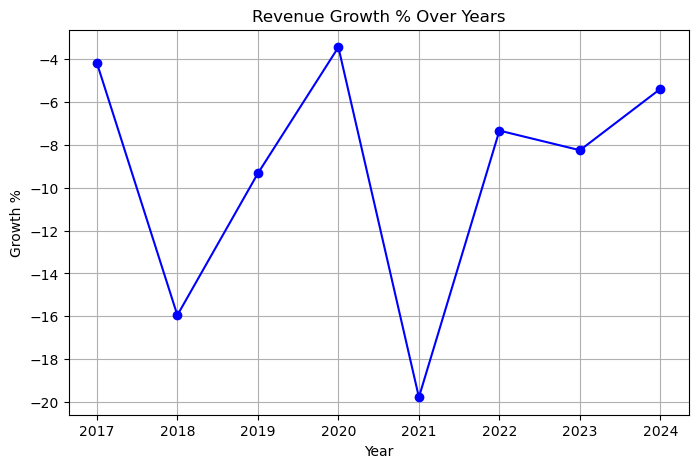


Cleaned data saved to 'cleaned_TCS_Financial_Data_2016_2025.csv' successfully!


In [8]:
plt.figure(figsize=(8,5))
plt.plot(df["Year"], df["Revenue_Growth_%"], marker='o', linestyle='-', color='blue')
plt.title("Revenue Growth % Over Years")
plt.xlabel("Year")
plt.ylabel("Growth %")
plt.grid(True)
plt.show()

df.to_csv("cleaned_TCS_Financial_Data_2016_2025.csv", index=False)
print("\nCleaned data saved to 'cleaned_TCS_Financial_Data_2016_2025.csv' successfully!")
